<a href="https://colab.research.google.com/github/GyanGartia/Machine-Learning/blob/main/lab_5_hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing library 
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch 
import seaborn as sns

In [ ]:
#reading csv file
# data = pd.read_csv('forestfires.csv')
data = pd.read_csv('/content/drive/MyDrive/dataset/forestfires.csv')

In [ ]:
data.head() 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
df = data.loc[:, ['temp', 'RH']]

In [ ]:
df.head()

,temp,RH
0,8.2,51
1,18.0,33
2,14.6,33
3,8.3,97
4,11.4,99


Text(0, 0.5, 'RH')

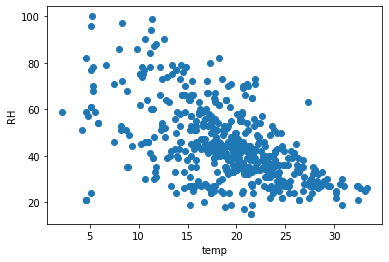

In [ ]:
# plotting scatter plot to know the the cluster
plt.scatter(data.temp,data['RH'])
plt.xlabel('temp')
plt.ylabel('RH')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


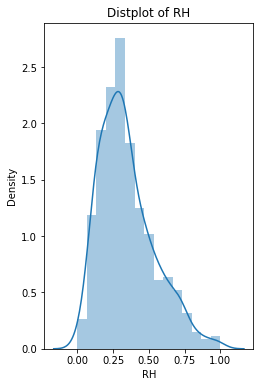

In [ ]:
plt.figure(1,figsize = (15,6))
graph = 0

for x in ['temp','RH']:
  graph += 1

plt.subplot(1,3,graph)
plt.subplots_adjust(hspace  = 0.5, wspace = 0.5)
sns.distplot(df[x],bins = 15)
plt.title('Distplot of {}'.format(x))

plt.show()

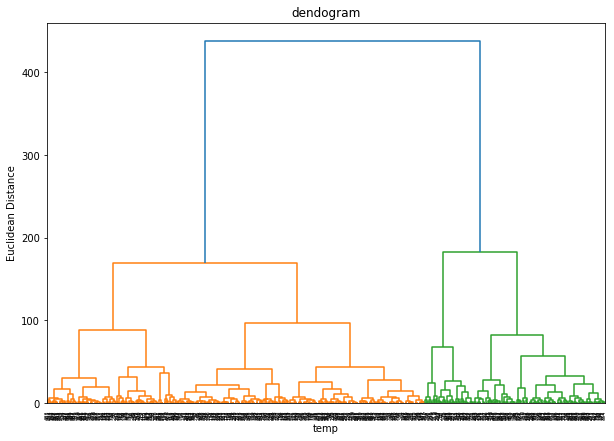

In [ ]:
# check for largest distance vertically without crossing ant horizontal line
plt.figure(figsize=(10, 7))
dendogram = sch.dendrogram(sch.linkage(df, method="ward"))
# dendogram = sch.dendogram(sch.linkage(data, method = 'ward'))
plt.title('dendogram')
plt.xlabel('temp')
plt.ylabel('Euclidean Distance')
plt.show()

In [ ]:
cluster  = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df)

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,

In [ ]:
cl = cluster.fit_predict(df)

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(df, cl)

0.541870631669494

In [ ]:
x = df.values

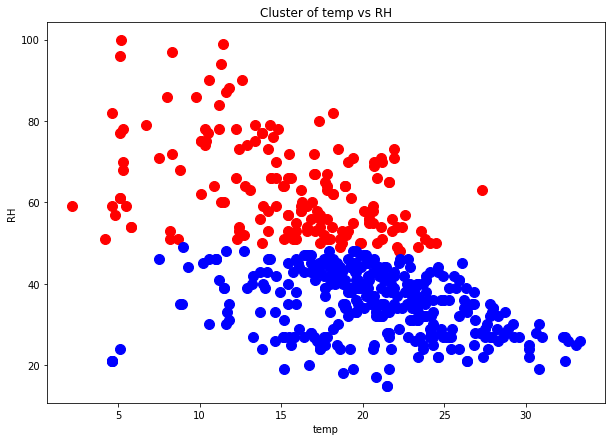

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(x[cl==0, 0], x[cl==0, 1], s=100, c='red', label='cluster 1')
plt.scatter(x[cl==1, 0], x[cl==1, 1], s=100, c='blue', label='cluster 2')
# plt.scatter(x[cl==0, 0], x[cl==0, 1], S=100, c='green', label='cluster 3')
plt.title('Cluster of temp vs RH')
plt.xlabel('temp')
plt.ylabel('RH')
plt.show()

In [ ]:
 # scaling the data
 scaler = MinMaxScaler()  # scaling between 0 to 1

scaler.fit(df[['RH']])
df['RH'] = scaler.transform(df[['RH']])

scaler.fit(df[['temp']])
df['temp'] = scaler.transform(df[['temp']])

In [ ]:
cl = cluster.fit_predict(df)

In [ ]:
silhouette_score(df, cl)

0.37983740104584496

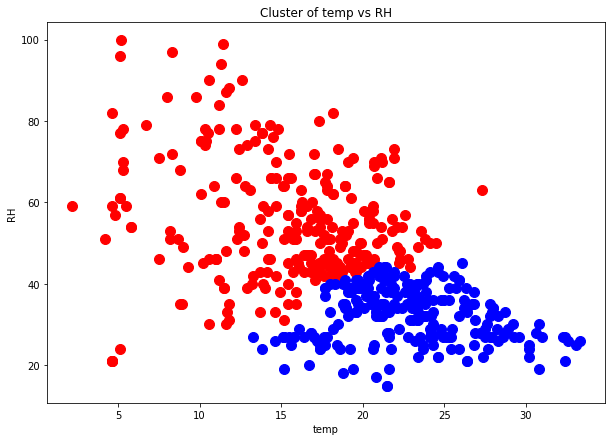

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(x[cl==0, 0], x[cl==0, 1], s=100, c='red', label='cluster 1')
plt.scatter(x[cl==1, 0], x[cl==1, 1], s=100, c='blue', label='cluster 2')
# plt.scatter(x[cl==0, 0], x[cl==0, 1], S=100, c='green', label='cluster 3')
plt.title('Cluster of temp vs RH')
plt.xlabel('temp')
plt.ylabel('RH')
plt.show()

In [ ]:
data['area'].value_counts()

0.00      247
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: area, Length: 251, dtype: int64